In [ ]:
from google.colab import files
uploaded = files.upload()

Saving news.csv to news (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv('news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [ ]:
df['label'].unique()

array(['FAKE', 'REAL'], dtype=object)

In [ ]:
# Define the mapping dictionary
label_map = {
    'FAKE': 0,
    'REAL': 1
}

df['label_b'] = df['label'].map(label_map)

In [ ]:
pip install contractions

In [ ]:
import contractions
import pandas as pd
from tqdm.notebook import tqdm

tqdm.pandas()

df['expanded_text'] = df['text'].progress_apply(lambda x: contractions.fix(str(x)))

  0%|          | 0/6335 [00:00<?, ?it/s]

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
import string
import pandas as pd
from tqdm import tqdm
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer

tqdm.pandas()

def clean_text(text, spell_correct=False, remove_stopwords=True):

    if not isinstance(text, str):
        return ""

    # 1. Lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r'http\S+|www\.\S+|https\S+', '', text)

    # 3. Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # 3. REMOVE datetime FIRST ✅
    text = re.sub(
        r'on\s+\w+,\s+\d{4}-\d{2}-\d{2}\s+at\s+\d{1,2}:\d{2}',
        '',
        text,
        flags=re.IGNORECASE
    )

    # 4. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # 5. Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)

    # 6. Remove hashtags (#hashtag)
    text = re.sub(r'#\w+', '', text)

    # 7. Remove repeated characters (heeeello -> helo)
    text = re.sub(r'(.)\1{2,}', r'\1', text)

    # 8. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 9. Remove numbers
    text = re.sub(r'\d+', '', text)

    # 10. Remove extra whitespace
    text = ' '.join(text.split())

    # 11. Tokenize
    tokens = text.split()

    # 12. Remove stopwords (optional)
    if remove_stopwords:
        stop_words = set(stopwords.words("english"))
        tokens = [w for w in tokens if w not in stop_words and len(w) >= 2]
    else:
        # Just filter short words
        tokens = [w for w in tokens if len(w) >= 2]
    """
    # 13. Spell correction (optional and SLOW)
    if spell_correct:
        tokens = [str(TextBlob(w).correct()) for w in tokens]
    """

    # Return cleaned tokens as string
    return ' '.join(tokens)


# Step 1: Clean the text
print("=== Step 1: Cleaning Text ===")
df['cleaned_text'] = df['expanded_text'].progress_apply(
    lambda x: clean_text(x, spell_correct=False, remove_stopwords=True)
)

print(f"Cleaning completed. Sample:\n{df['cleaned_text'].head(3)}")

=== Step 1: Cleaning Text ===


100%|██████████| 6335/6335 [00:14<00:00, 440.33it/s]

Cleaning completed. Sample:
0    daniel greenfield shillman journalism fellow f...
1    google pinterest digg linkedin reddit stumbleu...
2    yous secretary state john kerry said monday st...
Name: cleaned_text, dtype: object


In [ ]:
df

,Unnamed: 0,title,text,label,expanded_text,cleaned_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,"Daniel Greenfield, a Shillman Journalism Fello...",daniel greenfield shillman journalism fellow f...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,Google Pinterest Digg Linkedin Reddit Stumbleu...,google pinterest digg linkedin reddit stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,YOU.S. Secretary of State John F. Kerry said M...,yous secretary state john kerry said monday st...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",kaydee king november lesson tonights dem losse...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,It is primary day in New York and front-runner...,primary day new york frontrunners hillary clin...
...,...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,1,The State Department told the Republican Natio...,state department told republican national comm...
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,‘p’ pbs stand ‘plutocratic’ ‘pentagon’ posted ...
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,0,Anti-Trump Protesters Are Tools of the Oligar...,antitrump protesters tools oligarchy reform a...
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",1,"ADDIS ABABA, Ethiopia —President Obama convene...",addis ababa ethiopia —president obama convened...


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Using NLTK
import nltk
nltk.download('punkt')

def tokenize_text(text):
    # Word tokenization
    word_tokens = nltk.word_tokenize(text)
    # Sentence tokenization
    sentence_tokens = nltk.sent_tokenize(text)
    return word_tokens, sentence_tokens

#df_msg['word_tokens'] = tokenize_text(df_msg['cleaned_text'])
df[['word_tokens', 'sentence_tokens']] = df['cleaned_text'].progress_apply(
    lambda x: pd.Series(tokenize_text(x))
)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 6335/6335 [00:17<00:00, 371.90it/s]


In [ ]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 44.6 MB/s eta 0:00:00


In [ ]:
# pip install pyspellchecker spellchecker
from spellchecker import SpellChecker

def correct_spelling(tokens):
    spell = SpellChecker()
    corrected = [spell.correction(token) for token in tokens]
    return corrected

#df_msg['word_tokens'] = tokenize_text(df_msg['cleaned_text'])
df['correct_tokens'] = df['sentence_tokens'].progress_apply(
    lambda x: pd.Series(correct_spelling(x))
)

100%|██████████| 6335/6335 [33:13<00:00,  3.18it/s]


In [ ]:
#save it in a csv file after correct spelling
df.to_csv('Fake-News-Detection_correct_spelling.csv', index=False)

In [ ]:
df

,Unnamed: 0,title,text,label,expanded_text,cleaned_text,word_tokens,sentence_tokens,correct_tokens
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,"Daniel Greenfield, a Shillman Journalism Fello...",daniel greenfield shillman journalism fellow f...,"[daniel, greenfield, shillman, journalism, fel...",[daniel greenfield shillman journalism fellow ...,daniel greenfield shillman journalism fellow f...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,Google Pinterest Digg Linkedin Reddit Stumbleu...,google pinterest digg linkedin reddit stumbleu...,"[google, pinterest, digg, linkedin, reddit, st...",[google pinterest digg linkedin reddit stumble...,google pinterest digg linkedin reddit stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,YOU.S. Secretary of State John F. Kerry said M...,yous secretary state john kerry said monday st...,"[yous, secretary, state, john, kerry, said, mo...",[yous secretary state john kerry said monday s...,yous secretary state john kerry said monday st...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",kaydee king november lesson tonights dem losse...,"[kaydee, king, november, lesson, tonights, dem...",[kaydee king november lesson tonights dem loss...,kaydee king november lesson tonights dem losse...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,It is primary day in New York and front-runner...,primary day new york frontrunners hillary clin...,"[primary, day, new, york, frontrunners, hillar...",[primary day new york frontrunners hillary cli...,primary day new york frontrunners hillary clin...
...,...,...,...,...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,1,The State Department told the Republican Natio...,state department told republican national comm...,"[state, department, told, republican, national...",[state department told republican national com...,state department told republican national comm...
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,‘p’ pbs stand ‘plutocratic’ ‘pentagon’ posted ...,"[‘, p, ’, pbs, stand, ‘, plutocratic, ’, ‘, pe...",[‘p’ pbs stand ‘plutocratic’ ‘pentagon’ posted...,‘p’ pbs stand ‘plutocratic’ ‘pentagon’ posted ...
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,0,Anti-Trump Protesters Are Tools of the Oligar...,antitrump protesters tools oligarchy reform a...,"[antitrump, protesters, tools, oligarchy, ref...",[antitrump protesters tools oligarchy reform ...,antitrump protesters tools oligarchy reform a...
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",1,"ADDIS ABABA, Ethiopia —President Obama convene...",addis ababa ethiopia —president obama convened...,"[addis, ababa, ethiopia, —president, obama, co...",[addis ababa ethiopia —president obama convene...,addis ababa ethiopia —president obama convened...


In [ ]:
from google.colab import files

files.download('Fake-News-Detection_correct_spelling.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import re
import string
import pandas as pd
from tqdm import tqdm
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer

tqdm.pandas()

def apply_stemming_lemmatization(text):

    if not isinstance(text, str) or not text.strip():
        return {
            "lemma": "",
            "porter": "",
            "lancaster": "",
            "snowball": ""
        }

    # Tokenize
    tokens = text.split()

    # Initialize stemmers and lemmatizer
    porter = PorterStemmer()
    lancaster = LancasterStemmer()
    snowball = SnowballStemmer("english")
    lemmatizer = WordNetLemmatizer()

    # Apply each technique
    lemma_out = [lemmatizer.lemmatize(w) for w in tokens]
    porter_out = [porter.stem(w) for w in tokens]
    lancaster_out = [lancaster.stem(w) for w in tokens]
    snowball_out = [snowball.stem(w) for w in tokens]

    # Return all outputs
    return {
        "lemma": " ".join(lemma_out),
        "porter": " ".join(porter_out),
        "lancaster": " ".join(lancaster_out),
        "snowball": " ".join(snowball_out)
    }


# Step 2: Apply stemming and lemmatization
print("\n=== Step 2: Applying Stemming/Lemmatization ===")
df_stemmed = df['cleaned_text'].progress_apply(
    apply_stemming_lemmatization
).apply(pd.Series)
df_stemmed_correctspelling = df['correct_tokens'].progress_apply(
    apply_stemming_lemmatization
).apply(pd.Series)


=== Step 2: Applying Stemming/Lemmatization ===


100%|██████████| 6335/6335 [02:35<00:00, 40.79it/s]


In [ ]:
df

,Unnamed: 0,title,text,label,expanded_text,cleaned_text,word_tokens,sentence_tokens
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,"Daniel Greenfield, a Shillman Journalism Fello...",daniel greenfield shillman journalism fellow f...,"[daniel, greenfield, shillman, journalism, fel...",[daniel greenfield shillman journalism fellow ...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,Google Pinterest Digg Linkedin Reddit Stumbleu...,google pinterest digg linkedin reddit stumbleu...,"[google, pinterest, digg, linkedin, reddit, st...",[google pinterest digg linkedin reddit stumble...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,YOU.S. Secretary of State John F. Kerry said M...,yous secretary state john kerry said monday st...,"[yous, secretary, state, john, kerry, said, mo...",[yous secretary state john kerry said monday s...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",kaydee king november lesson tonights dem losse...,"[kaydee, king, november, lesson, tonights, dem...",[kaydee king november lesson tonights dem loss...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,It is primary day in New York and front-runner...,primary day new york frontrunners hillary clin...,"[primary, day, new, york, frontrunners, hillar...",[primary day new york frontrunners hillary cli...
...,...,...,...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,1,The State Department told the Republican Natio...,state department told republican national comm...,"[state, department, told, republican, national...",[state department told republican national com...
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,‘p’ pbs stand ‘plutocratic’ ‘pentagon’ posted ...,"[‘, p, ’, pbs, stand, ‘, plutocratic, ’, ‘, pe...",[‘p’ pbs stand ‘plutocratic’ ‘pentagon’ posted...
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,0,Anti-Trump Protesters Are Tools of the Oligar...,antitrump protesters tools oligarchy reform a...,"[antitrump, protesters, tools, oligarchy, ref...",[antitrump protesters tools oligarchy reform ...
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",1,"ADDIS ABABA, Ethiopia —President Obama convene...",addis ababa ethiopia —president obama convened...,"[addis, ababa, ethiopia, —president, obama, co...",[addis ababa ethiopia —president obama convene...


In [ ]:
df_stemmed

,lemma,porter,lancaster,snowball
0,daniel greenfield shillman journalism fellow f...,daniel greenfield shillman journal fellow free...,daniel greenfield shillm journ fellow freedom ...,daniel greenfield shillman journal fellow free...
1,google pinterest digg linkedin reddit stumbleu...,googl pinterest digg linkedin reddit stumbleup...,googl pinterest dig linkedin reddit stumbleupo...,googl pinterest digg linkedin reddit stumbleup...
2,yous secretary state john kerry said monday st...,you secretari state john kerri said monday sto...,yo secret stat john kerry said monday stop par...,yous secretari state john kerri said monday st...
3,kaydee king november lesson tonight dem loss t...,kayde king novemb lesson tonight dem loss time...,kayd king novemb lesson tonight dem loss tim d...,kayde king novemb lesson tonight dem loss time...
4,primary day new york frontrunners hillary clin...,primari day new york frontrunn hillari clinton...,prim day new york frontrun hil clinton donald ...,primari day new york frontrunn hillari clinton...
...,...,...,...,...
6330,state department told republican national comm...,state depart told republican nation committe c...,stat depart told republ nat commit could find ...,state depart told republican nation committe c...
6331,‘p’ pb stand ‘plutocratic’ ‘pentagon’ posted o...,‘p’ pb stand ‘plutocratic’ ‘pentagon’ post oct...,‘p’ pbs stand ‘plutocratic’ ‘pentagon’ post oc...,p pbs stand plutocrat pentagon post oct wikime...
6332,antitrump protester tool oligarchy reform alw...,antitrump protest tool oligarchi reform alway...,antitrump protest tool oligarchy reform alway...,antitrump protest tool oligarchi reform alway...
6333,addis ababa ethiopia —president obama convened...,addi ababa ethiopia —presid obama conven meet ...,ad abab ethiop —president obam conv meet lead ...,addi ababa ethiopia —presid obama conven meet ...


In [ ]:
df_final = pd.concat([df, df_stemmed,df_stemmed2], axis=1)

In [ ]:
df_final

,Unnamed: 0,title,text,label,expanded_text,cleaned_text,word_tokens,sentence_tokens,correct_tokens,lemma,porter,lancaster,snowball,lemma,porter,lancaster,snowball
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,"Daniel Greenfield, a Shillman Journalism Fello...",daniel greenfield shillman journalism fellow f...,"[daniel, greenfield, shillman, journalism, fel...",[daniel greenfield shillman journalism fellow ...,daniel greenfield shillman journalism fellow f...,daniel greenfield shillman journalism fellow f...,daniel greenfield shillman journal fellow free...,daniel greenfield shillm journ fellow freedom ...,daniel greenfield shillman journal fellow free...,daniel greenfield shillman journalism fellow f...,daniel greenfield shillman journal fellow free...,daniel greenfield shillm journ fellow freedom ...,daniel greenfield shillman journal fellow free...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,Google Pinterest Digg Linkedin Reddit Stumbleu...,google pinterest digg linkedin reddit stumbleu...,"[google, pinterest, digg, linkedin, reddit, st...",[google pinterest digg linkedin reddit stumble...,google pinterest digg linkedin reddit stumbleu...,google pinterest digg linkedin reddit stumbleu...,googl pinterest digg linkedin reddit stumbleup...,googl pinterest dig linkedin reddit stumbleupo...,googl pinterest digg linkedin reddit stumbleup...,google pinterest digg linkedin reddit stumbleu...,googl pinterest digg linkedin reddit stumbleup...,googl pinterest dig linkedin reddit stumbleupo...,googl pinterest digg linkedin reddit stumbleup...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,YOU.S. Secretary of State John F. Kerry said M...,yous secretary state john kerry said monday st...,"[yous, secretary, state, john, kerry, said, mo...",[yous secretary state john kerry said monday s...,yous secretary state john kerry said monday st...,yous secretary state john kerry said monday st...,you secretari state john kerri said monday sto...,yo secret stat john kerry said monday stop par...,yous secretari state john kerri said monday st...,yous secretary state john kerry said monday st...,you secretari state john kerri said monday sto...,yo secret stat john kerry said monday stop par...,yous secretari state john kerri said monday st...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",kaydee king november lesson tonights dem losse...,"[kaydee, king, november, lesson, tonights, dem...",[kaydee king november lesson tonights dem loss...,kaydee king november lesson tonights dem losse...,kaydee king november lesson tonight dem loss t...,kayde king novemb lesson tonight dem loss time...,kayd king novemb lesson tonight dem loss tim d...,kayde king novemb lesson tonight dem loss time...,kaydee king november lesson tonight dem loss t...,kayde king novemb lesson tonight dem loss time...,kayd king novemb lesson tonight dem loss tim d...,kayde king novemb lesson tonight dem loss time...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,It is primary day in New York and front-runner...,primary day new york frontrunners hillary clin...,"[primary, day, new, york, frontrunners, hillar...",[primary day new york frontrunners hillary cli...,primary day new york frontrunners hillary clin...,primary day new york frontrunners hillary clin...,primari day new york frontrunn hillari clinton...,prim day new york frontrun hil clinton donald ...,primari day new york frontrunn hillari clinton...,primary day new york frontrunners hillary clin...,primari day new york frontrunn hillari clinton...,prim day new york frontrun hil clinton donald ...,primari day new york frontrunn hillari clinton...
...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
mask = df_stemmed['lemma'] != df_stemmed2['lemma']
df_diff = df_stemmed.loc[mask, ['lemma']].copy()
df_diff['lemma_2'] = df_stemmed2.loc[mask, 'lemma']

df_diff

,lemma,lemma_2
99,online comment fit closely campaign platform,
238,hillary clinton cannot believe losing,
756,source add conversation using facebook comment,
807,part babylon sun worship,
1025,online comment fit closely campaign platform,
1268,posted nov th madjez madjez,
1590,still take time twitter feud,
1647,clinton email trade deal held election,
1802,actualy like trump thoif yu like idiot﻿,
1932,source add conversation using facebook comment,


In [ ]:
from collections import Counter
import nltk

def create_vocabulary(texts, min_freq=2, max_vocab_size=10000):
    all_tokens = []
    for text in texts:
        tokens = nltk.word_tokenize(text.lower())
        all_tokens.extend(tokens)

    token_counts = Counter(all_tokens)
    # Fix the typo here
    vocab = {token: count for token, count in token_counts.most_common(max_vocab_size) if count >= min_freq}

    token2id = {token: idx for idx, (token, _) in enumerate(vocab.items())}
    id2token = {idx: token for token, idx in token2id.items()}

    return vocab, token2id, id2token

vocab, token2id, id2token = create_vocabulary(df_stemmed['lemma'], min_freq=2)

In [ ]:
vocab

{'“': 34116,
 '”': 33360,
 '’': 29449,
 's': 24445,
 'trump': 22009,
 'said': 21175,
 'clinton': 17761,
 'state': 14790,
 'would': 14517,
 'one': 11835,
 'people': 11793,
 'republican': 9379,
 'new': 9267,
 'president': 8842,
 'year': 8795,
 'time': 8772,
 'also': 8211,
 'campaign': 8201,
 'u': 8037,
 'american': 7700,
 'obama': 7444,
 'say': 7330,
 'like': 7223,
 'hillary': 7139,
 'could': 6986,
 'even': 6424,
 'party': 6407,
 'election': 6263,
 'many': 5848,
 'country': 5773,
 'candidate': 5648,
 'government': 5612,
 'get': 5509,
 'first': 5373,
 'make': 5366,
 'right': 5352,
 'day': 5305,
 'two': 5291,
 'political': 5161,
 'yous': 5023,
 'way': 5008,
 'house': 4879,
 'world': 4829,
 'going': 4781,
 'vote': 4662,
 'voter': 4633,
 'think': 4631,
 'white': 4525,
 'know': 4507,
 'percent': 4404,
 'war': 4351,
 'email': 4351,
 'last': 4349,
 'news': 4319,
 'presidential': 4276,
 'may': 4202,
 'want': 4159,
 'donald': 4128,
 'democratic': 4034,
 'take': 4031,
 'much': 4030,
 'told': 4019,

In [ ]:
"""
import pandas as pd

df_vocab = pd.DataFrame({
    'token': list(vocab.keys()),
    'token2id': [token2id[token] for token in vocab.keys()],
    'id2token': [id2token[token2id[token]] for token in vocab.keys()]
})

df_vocab.head()
"""

In [ ]:
import pandas as pd

df_vocab = pd.DataFrame({
    "token": list(vocab.keys()),
    "count": list(vocab.values()),
    "token_id": [token2id[token] for token in vocab.keys()]
})

In [ ]:
df_vocab

,token,count,token_id
0,“,34116,0
1,”,33360,1
2,’,29449,2
3,s,24445,3
4,trump,22009,4
...,...,...,...
9995,harold,23,9995
9996,eradicate,23,9996
9997,schwartz,23,9997
9998,igor,23,9998


In [ ]:
df_final

,Unnamed: 0,title,text,label,expanded_text,cleaned_text,word_tokens,sentence_tokens,correct_tokens,lemma,porter,lancaster,snowball,lemma,porter,lancaster,snowball
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,"Daniel Greenfield, a Shillman Journalism Fello...",daniel greenfield shillman journalism fellow f...,"[daniel, greenfield, shillman, journalism, fel...",[daniel greenfield shillman journalism fellow ...,daniel greenfield shillman journalism fellow f...,daniel greenfield shillman journalism fellow f...,daniel greenfield shillman journal fellow free...,daniel greenfield shillm journ fellow freedom ...,daniel greenfield shillman journal fellow free...,daniel greenfield shillman journalism fellow f...,daniel greenfield shillman journal fellow free...,daniel greenfield shillm journ fellow freedom ...,daniel greenfield shillman journal fellow free...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,Google Pinterest Digg Linkedin Reddit Stumbleu...,google pinterest digg linkedin reddit stumbleu...,"[google, pinterest, digg, linkedin, reddit, st...",[google pinterest digg linkedin reddit stumble...,google pinterest digg linkedin reddit stumbleu...,google pinterest digg linkedin reddit stumbleu...,googl pinterest digg linkedin reddit stumbleup...,googl pinterest dig linkedin reddit stumbleupo...,googl pinterest digg linkedin reddit stumbleup...,google pinterest digg linkedin reddit stumbleu...,googl pinterest digg linkedin reddit stumbleup...,googl pinterest dig linkedin reddit stumbleupo...,googl pinterest digg linkedin reddit stumbleup...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,YOU.S. Secretary of State John F. Kerry said M...,yous secretary state john kerry said monday st...,"[yous, secretary, state, john, kerry, said, mo...",[yous secretary state john kerry said monday s...,yous secretary state john kerry said monday st...,yous secretary state john kerry said monday st...,you secretari state john kerri said monday sto...,yo secret stat john kerry said monday stop par...,yous secretari state john kerri said monday st...,yous secretary state john kerry said monday st...,you secretari state john kerri said monday sto...,yo secret stat john kerry said monday stop par...,yous secretari state john kerri said monday st...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",kaydee king november lesson tonights dem losse...,"[kaydee, king, november, lesson, tonights, dem...",[kaydee king november lesson tonights dem loss...,kaydee king november lesson tonights dem losse...,kaydee king november lesson tonight dem loss t...,kayde king novemb lesson tonight dem loss time...,kayd king novemb lesson tonight dem loss tim d...,kayde king novemb lesson tonight dem loss time...,kaydee king november lesson tonight dem loss t...,kayde king novemb lesson tonight dem loss time...,kayd king novemb lesson tonight dem loss tim d...,kayde king novemb lesson tonight dem loss time...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,It is primary day in New York and front-runner...,primary day new york frontrunners hillary clin...,"[primary, day, new, york, frontrunners, hillar...",[primary day new york frontrunners hillary cli...,primary day new york frontrunners hillary clin...,primary day new york frontrunners hillary clin...,primari day new york frontrunn hillari clinton...,prim day new york frontrun hil clinton donald ...,primari day new york frontrunn hillari clinton...,primary day new york frontrunners hillary clin...,primari day new york frontrunn hillari clinton...,prim day new york frontrun hil clinton donald ...,primari day new york frontrunn hillari clinton...
...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Bag of Words
count_vec = CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, token_pattern=None)

# Word TF-IDF
tfidf = TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, token_pattern=None)

In [ ]:
df_final

,Unnamed: 0,title,text,label,expanded_text,cleaned_text,word_tokens,sentence_tokens,correct_tokens,lemma,porter,lancaster,snowball,lemma,porter,lancaster,snowball,correct_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,"Daniel Greenfield, a Shillman Journalism Fello...",daniel greenfield shillman journalism fellow f...,"[daniel, greenfield, shillman, journalism, fel...",[daniel greenfield shillman journalism fellow ...,daniel greenfield shillman journalism fellow f...,daniel greenfield shillman journalism fellow f...,daniel greenfield shillman journal fellow free...,daniel greenfield shillm journ fellow freedom ...,daniel greenfield shillman journal fellow free...,daniel greenfield shillman journalism fellow f...,daniel greenfield shillman journal fellow free...,daniel greenfield shillm journ fellow freedom ...,daniel greenfield shillman journal fellow free...,daniel greenfield shillman journalism fellow f...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,Google Pinterest Digg Linkedin Reddit Stumbleu...,google pinterest digg linkedin reddit stumbleu...,"[google, pinterest, digg, linkedin, reddit, st...",[google pinterest digg linkedin reddit stumble...,google pinterest digg linkedin reddit stumbleu...,google pinterest digg linkedin reddit stumbleu...,googl pinterest digg linkedin reddit stumbleup...,googl pinterest dig linkedin reddit stumbleupo...,googl pinterest digg linkedin reddit stumbleup...,google pinterest digg linkedin reddit stumbleu...,googl pinterest digg linkedin reddit stumbleup...,googl pinterest dig linkedin reddit stumbleupo...,googl pinterest digg linkedin reddit stumbleup...,google pinterest digg linkedin reddit stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,YOU.S. Secretary of State John F. Kerry said M...,yous secretary state john kerry said monday st...,"[yous, secretary, state, john, kerry, said, mo...",[yous secretary state john kerry said monday s...,yous secretary state john kerry said monday st...,yous secretary state john kerry said monday st...,you secretari state john kerri said monday sto...,yo secret stat john kerry said monday stop par...,yous secretari state john kerri said monday st...,yous secretary state john kerry said monday st...,you secretari state john kerri said monday sto...,yo secret stat john kerry said monday stop par...,yous secretari state john kerri said monday st...,yous secretary state john kerry said monday st...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",kaydee king november lesson tonights dem losse...,"[kaydee, king, november, lesson, tonights, dem...",[kaydee king november lesson tonights dem loss...,kaydee king november lesson tonights dem losse...,kaydee king november lesson tonight dem loss t...,kayde king novemb lesson tonight dem loss time...,kayd king novemb lesson tonight dem loss tim d...,kayde king novemb lesson tonight dem loss time...,kaydee king november lesson tonight dem loss t...,kayde king novemb lesson tonight dem loss time...,kayd king novemb lesson tonight dem loss tim d...,kayde king novemb lesson tonight dem loss time...,kaydee king november lesson tonights dem losse...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,It is primary day in New York and front-runner...,primary day new york frontrunners hillary clin...,"[primary, day, new, york, frontrunners, hillar...",[primary day new york frontrunners hillary cli...,primary day new york frontrunners hillary clin...,primary day new york frontrunners hillary clin...,primari day new york frontrunn hillari clinton...,prim day new york frontrun hil clinton donald ...,primari day new york frontrunn hillari clinton...,primary day new york frontrunners hill

In [ ]:
"""
df_final['text_string'] = df_final['correct_tokens'].apply(
    lambda x: ' '.join(x) if isinstance(x, list) else ''
)
count_vec = CountVectorizer(min_df=2, max_features=5000)
X = count_vec.fit_transform(df_final['text_string'])"""

"\ndf_final['text_string'] = df_final['correct_tokens'].apply(\n    lambda x: ' '.join(x) if isinstance(x, list) else ''\n)\ncount_vec = CountVectorizer(min_df=2, max_features=5000)\nX = count_vec.fit_transform(df_final['text_string'])"

In [ ]:
# Ensure clean token lists
"""df_final['correct_tokens'] = df_final['correct_tokens'].apply(
    lambda x: x if isinstance(x, list) else []

count_vec = CountVectorizer(
    tokenizer=lambda x: x,
    preprocessor=lambda x: x,
    token_pattern=None,
    min_df=2,
    max_features=5000
)

#X = count_vec.fit_transform(df_final['correct_tokens'].tolist())
X = count_vec.fit_transform(df_final['text_string'])
"""

"df_final['correct_tokens'] = df_final['correct_tokens'].apply(\n    lambda x: x if isinstance(x, list) else []\n\ncount_vec = CountVectorizer(\n    tokenizer=lambda x: x,\n    preprocessor=lambda x: x,\n    token_pattern=None,\n    min_df=2,\n    max_features=5000\n)\n\n#X = count_vec.fit_transform(df_final['correct_tokens'].tolist())\nX = count_vec.fit_transform(df_final['text_string'])\n"

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def vectorize_text(text_series):
    count_vec = CountVectorizer(
        min_df=2,
        max_features=5000
    )
    bow = count_vec.fit_transform(text_series)

    tfidf_vec = TfidfVectorizer(
        analyzer='char_wb',
        ngram_range=(3,5),
        min_df=2,
        max_features=5000
    )
    tfidf = tfidf_vec.fit_transform(text_series)

    return (
        bow,
        count_vec.get_feature_names_out(),
        tfidf,
        tfidf_vec.get_feature_names_out()
    )

df_final['correct_text'] = df_final['correct_tokens'].apply(
    lambda x: " ".join(x) if isinstance(x, list) else str(x)
)
bow, bow_features, tfidf, tfidf_features = vectorize_text(df_final['correct_text'])

In [ ]:
from sklearn.model_selection import train_test_split

X = tfidf   # or bow
y = df_final['label']   # spam / ham

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    n_jobs=-1
)

lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)

In [ ]:
from sklearn.metrics import classification_report

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       633
           1       0.92      0.89      0.90       634

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC(
    class_weight='balanced'
)

svm.fit(X_train, y_train)

LinearSVC(class_weight='balanced')

In [ ]:
y_pred_svm = svm.predict(X_test)

print("Linear SVM Results")
print(classification_report(y_test, y_pred_svm))

Linear SVM Results
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       633
           1       0.92      0.92      0.92       634

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



In [ ]:
from sklearn.metrics import f1_score

print("LR F1:", f1_score(y_test, y_pred_lr))
print("SVM F1:", f1_score(y_test, y_pred_svm))

LR F1: 0.9013632718524459
SVM F1: 0.9212598425196851


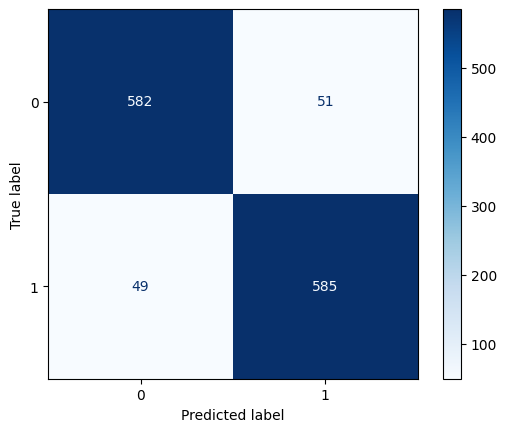

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    svm,
    X_test,
    y_test,
    cmap='Blues'
)

In [ ]:
"""
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

df_final['correct_tokens_str'] = df_final['correct_tokens'].apply(lambda x: ' '.join(x))

count_vec = CountVectorizer(min_df=2, max_features=5000)
bow = count_vec.fit_transform(df_final['correct_tokens_str'])

tfidf_vec = TfidfVectorizer(analyzer='char_wb', ngram_range=(3,5), min_df=2, max_features=5000)
tfidf = tfidf_vec.fit_transform(df_final['correct_tokens_str'])
"""

"\nfrom sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer\n\ndf_final['correct_tokens_str'] = df_final['correct_tokens'].apply(lambda x: ' '.join(x))\n\ncount_vec = CountVectorizer(min_df=2, max_features=5000)\nbow = count_vec.fit_transform(df_final['correct_tokens_str'])\n\ntfidf_vec = TfidfVectorizer(analyzer='char_wb', ngram_range=(3,5), min_df=2, max_features=5000)\ntfidf = tfidf_vec.fit_transform(df_final['correct_tokens_str'])\n"

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = bow
y = df_final['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(
    min_df=2,
    max_features=5000
)

X = count_vec.fit_transform(df_final['correct_text'])


In [ ]:
def predict_news(text):
    vector = count_vec.transform([text])
    pred = model.predict(vector)[0]
    prob = model.predict_proba(vector)[0]
    return pred, prob

news = "Breaking: Scientists confirm water cures all diseases overnight"
pred, prob = predict_news(news)

print("Prediction:", "Fake" if pred == 0 else "Real")
print("Confidence:", max(prob))

Prediction: Fake
Confidence: 0.8543283356685889
